<a href="https://colab.research.google.com/github/Selva-Subramanian/Company-bankruptcy-prediction/blob/main/COMPANY_BANKRUPTCY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Prediction of bankruptcy is a phenomenon of increasing interest to firms who
stand to loose money because on unpaid debts. Since computers can store huge dataset
pertaining to bankruptcy making accurate predictions from them before hand is becoming
important. 

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

 In this project you will use various classification algorithms on bankruptcy
dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Attribute Information**

Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

Y - Bankrupt?: Class label 1 : Yes , 0: No 

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
# import the required libraries

import numpy as np
import pandas as pd
import xgboost as xgb

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from datetime import datetime

In [103]:
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter Notebooks/Capstone projects/CP3 - Supervised - Classification/'
df = pd.read_csv(working_dir_path + 'Copy of COMPANY BANKRUPTCY PREDICTION.csv')

In [104]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [106]:
df[[' Liability-Assets Flag', ' Net Income Flag']] = df[[' Liability-Assets Flag', ' Net Income Flag']].astype(float)

In [107]:
pd.set_option('display.max_columns', None)
df.describe(include = 'all')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [108]:
columns = list(df.columns)
columns

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

In [109]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print(f'There are {len(numerical)} numerical variables')

There are 96 numerical variables


In [110]:
discrete = []
for var in numerical:
  if len(df[var].unique())<10:
    discrete.append(var)
    print(var, f'Values: {df[var].unique()}')
print(f'There are {len(discrete)} discrete variables')

Bankrupt? Values: [1 0]
 Liability-Assets Flag Values: [0. 1.]
 Net Income Flag Values: [1.]
There are 3 discrete variables


In [111]:
df[discrete[1]].value_counts()

0.0    6811
1.0       8
Name:  Liability-Assets Flag, dtype: int64

#### There is only one value in Net Income Flag Values and 99.9% of the values in Liability-Assets Flag values is just the same value, as we can't extract much information from such columns we can drop them.

In [112]:
df = df.drop([discrete[1], discrete[2]], axis = 1)

In [113]:
min_mismatch = []
max_mismatch = []
for i in df.columns:
  if df[i].min() != 0.0:
    min_mismatch.append(i)
  if df[i].max() != 1:
    max_mismatch.append(i)

In [114]:
min_mismatch

[]

In [115]:
max_mismatch

[' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Current Liability',
 ' Long-term Liability to Current Assets',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' Fixed Assets to Assets',
 ' Total assets to GNP price']

In [116]:
for i in max_mismatch:
  print(i,':',' median value :', round(df[i].median(), 5),', max value :', round(df[i].max(), 5))

 Operating Expense Rate :  median value : 0.00028 , max value : 9990000000.0
 Research and development expense rate :  median value : 509000000.0 , max value : 9980000000.0
 Interest-bearing debt interest rate :  median value : 0.00032 , max value : 990000000.0
 Revenue Per Share (Yuan ¥) :  median value : 0.02738 , max value : 3020000000.0
 Total Asset Growth Rate :  median value : 6400000000.0 , max value : 9990000000.0
 Net Value Growth Rate :  median value : 0.00046 , max value : 9330000000.0
 Current Ratio :  median value : 0.01059 , max value : 2750000000.0
 Quick Ratio :  median value : 0.00741 , max value : 9230000000.0
 Total debt/Total net worth :  median value : 0.00555 , max value : 9940000000.0
 Accounts Receivable Turnover :  median value : 0.00097 , max value : 9740000000.0
 Average Collection Days :  median value : 0.00657 , max value : 9730000000.0
 Inventory Turnover Rate (times) :  median value : 0.00076 , max value : 9990000000.0
 Fixed Assets Turnover Frequency :  

In [117]:
replace_with_median = []
for i in max_mismatch:
  count_1 = len(df[i][df[i]>1.0])
  count_2 = len(df[i])
  if (count_1/count_2)*100 < 5.0:
    replace_with_median.append(i)
  print(i, f'Percent of values greater than 1 : {(count_1/count_2)*100}')

 Operating Expense Rate Percent of values greater than 1 : 33.465317495233904
 Research and development expense rate Percent of values greater than 1 : 59.14356943833406
 Interest-bearing debt interest rate Percent of values greater than 1 : 3.2409444200029327
 Revenue Per Share (Yuan ¥) Percent of values greater than 1 : 0.07332453438920664
 Total Asset Growth Rate Percent of values greater than 1 : 88.23874468397126
 Net Value Growth Rate Percent of values greater than 1 : 0.029329813755682648
 Current Ratio Percent of values greater than 1 : 0.014664906877841324
 Quick Ratio Percent of values greater than 1 : 0.13198416190057194
 Total debt/Total net worth Percent of values greater than 1 : 0.11731925502273059
 Accounts Receivable Turnover Percent of values greater than 1 : 0.32262795131250915
 Average Collection Days Percent of values greater than 1 : 0.2639683238011439
 Inventory Turnover Rate (times) Percent of values greater than 1 : 43.20281566212055
 Fixed Assets Turnover Freq

In [118]:
pending = []
for i in max_mismatch:
  if i not in list(replace_with_median):
    pending.append(i) 

In [119]:
for i in replace_with_median:
  replace = df[i] > 1.0
  df.loc[replace, i] = df[i].median()

In [120]:
pending

[' Operating Expense Rate',
 ' Research and development expense rate',
 ' Total Asset Growth Rate',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate']

In [121]:
df_t = pd.DataFrame()
for i in df.columns:
  if i not in pending:
    df_t[i] = df[i]

In [122]:
df_t

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Working capitcal Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,0.593831,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,0.001384,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,0.593916,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.9988

### **Handling Class Imbalance**

In [123]:
df_t['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


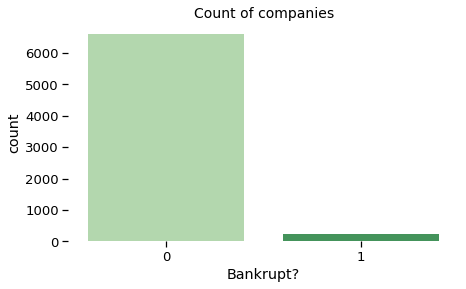

In [124]:
# The frequency of defaults
yes = df_t['Bankrupt?'].value_counts()[1]
no = df_t['Bankrupt?'].value_counts()[0]

# Percentage
yes_perc = round(yes/len(df_t)*100, 1)
no_perc = round(no/len(df_t)*100, 1)

plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Bankrupt?',data=df_t, palette="Greens")
# plt.annotate('Not-Bankrupt: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
# plt.annotate('Bankrupt: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
# plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
# plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('Count of companies', size=14)
plt.box(False)

In [125]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(df_t.iloc[:, 1:], df_t['Bankrupt?'])

In [126]:
x_smote.shape

(13198, 85)

In [127]:
df = pd.DataFrame(data=x_smote, columns=df_t.columns)

In [128]:
df['Bankrupt?'] = y_smote

In [129]:
df['Bankrupt?'].value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

In [130]:
X = df.iloc[:,1:]

In [131]:
y = df.iloc[:,0:1]

### <b> Implementing K Nearest Neighbours

In [132]:
# Splitting the dataset for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [133]:
neighbours = range(1,30)

# storing training and test accuracies
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

# setting up the model
for i,j in enumerate(neighbours):
  knn = KNeighborsClassifier(n_neighbors=j)

  # fitting the model
  knn.fit(X_train, y_train)

  # Updating accuracies with respective K neighbour 
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

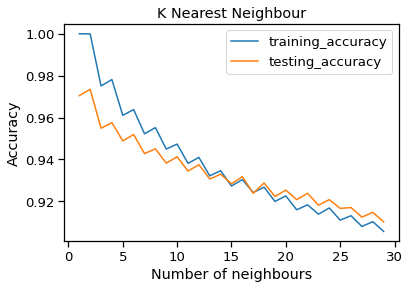

In [134]:
plt.plot(neighbours, train_accuracy, label = 'training_accuracy')
plt.plot(neighbours, test_accuracy, label = 'testing_accuracy')
plt.title("K Nearest Neighbour")
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.legend()

In [135]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [136]:
# making predictions
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,-1]
accuracy_score(y_test, y_pred)

0.9253787878787879

[[1073  196]
 [   1 1370]]


[Text(0, 0.5, 'Not-Bankrupt'), Text(0, 1.5, 'Bankrupt')]

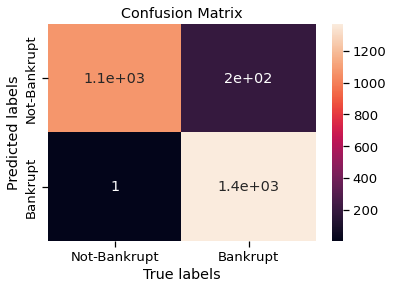

In [137]:
# get the confusion matrix
labels = ['Not-Bankrupt', 'Bankrupt']
cm = confusion_matrix(y_test, y_pred)
print(cm)

# plotting the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


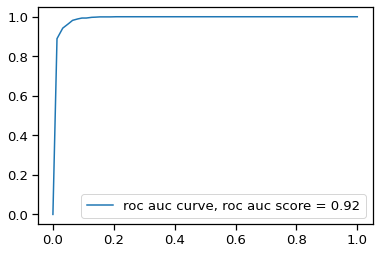

In [138]:
# ploting roc area under curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr, label = f"roc auc curve, roc auc score = {auc.round(2)}")
plt.legend(loc='lower right')
plt.show()

### **Implementing Decision Tree**

In [139]:
# parameters for decision tree
parameter_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [140]:
# evaluation with gridsearch cv
grid_cv = GridSearchCV(DecisionTreeClassifier(), parameter_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_cv.fit(X_train, y_train)
print(f'best score: {grid_cv.best_score_}')
print(f'best parameters: {grid_cv.best_params_}')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
best score: 0.8672094183523211
best parameters: {'max_depth': 20, 'min_samples_split': 0.1}


In [141]:
dtc = grid_cv.best_estimator_

In [142]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)

In [143]:
y_pred = dtc.predict(X_test)
y_pred_proba = dtc.predict_proba(X_test)[:,-1]

In [144]:
accuracy_score(y_pred, y_test)

0.8757575757575757

[[1084  185]
 [ 143 1228]]


[Text(0, 0.5, 'Not-Bankrupt'), Text(0, 1.5, 'Bankrupt')]

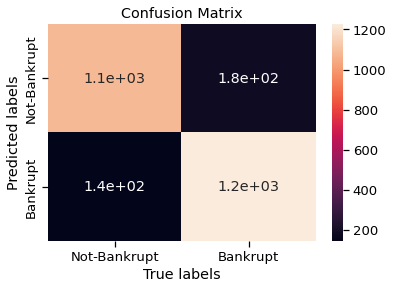

In [145]:
# get the confusion matrix
labels = ['Not-Bankrupt', 'Bankrupt']
cm = confusion_matrix(y_test, y_pred)
print(cm)

# plotting the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

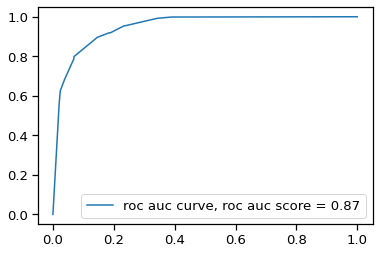

In [146]:
# ploting roc area under curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr, label = f"roc auc curve, roc auc score = {auc.round(2)}")
plt.legend(loc='lower right')
plt.show()

In [147]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

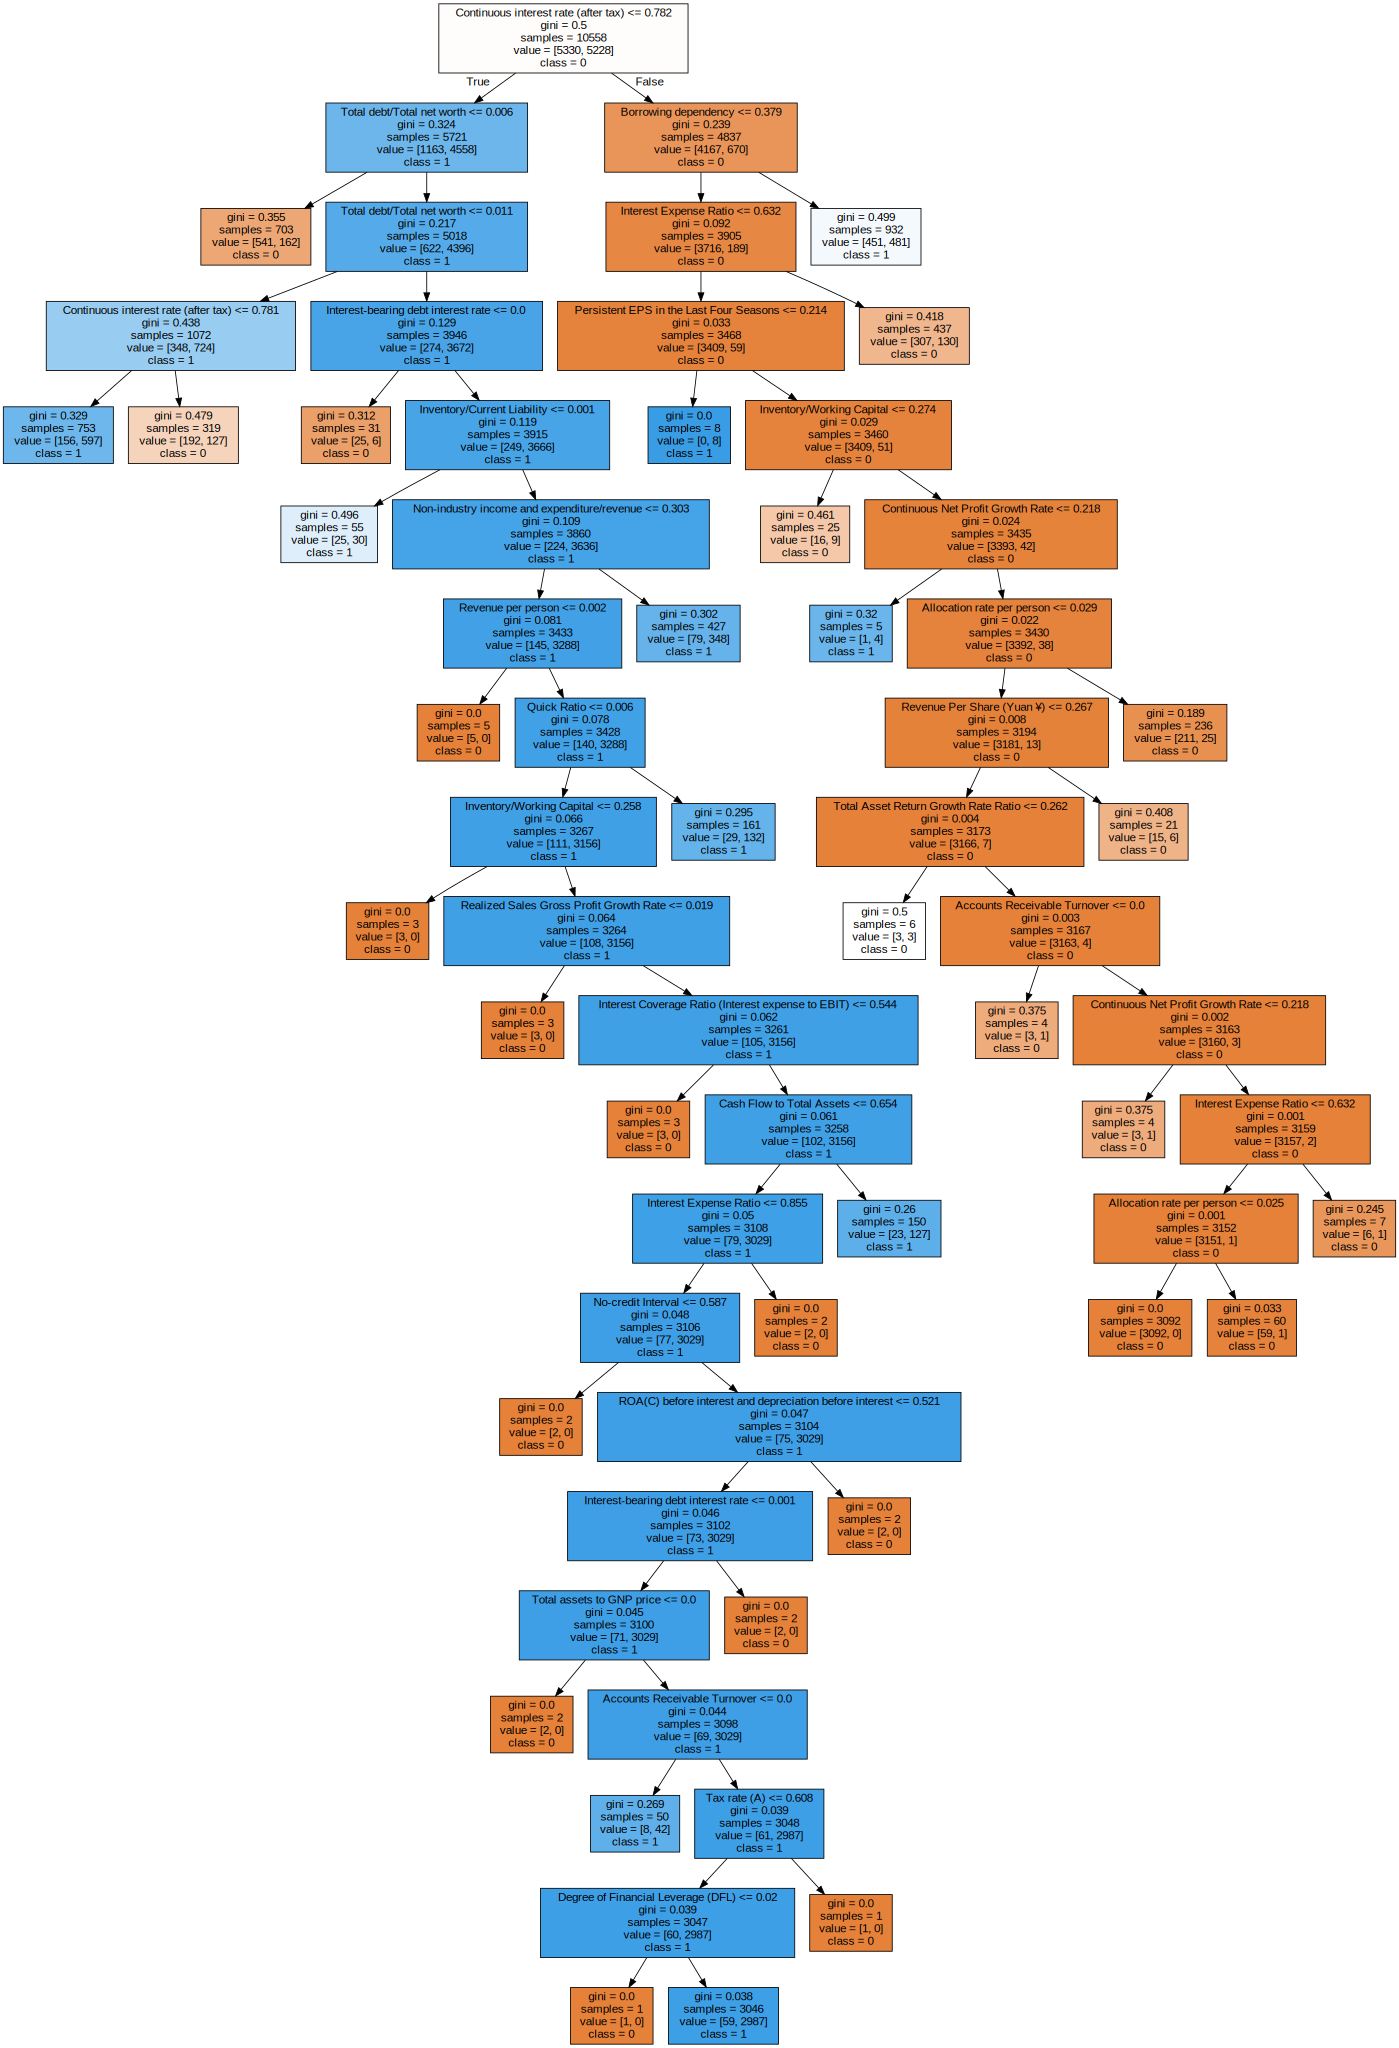

In [148]:
graph = Source(tree.export_graphviz(dtc, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

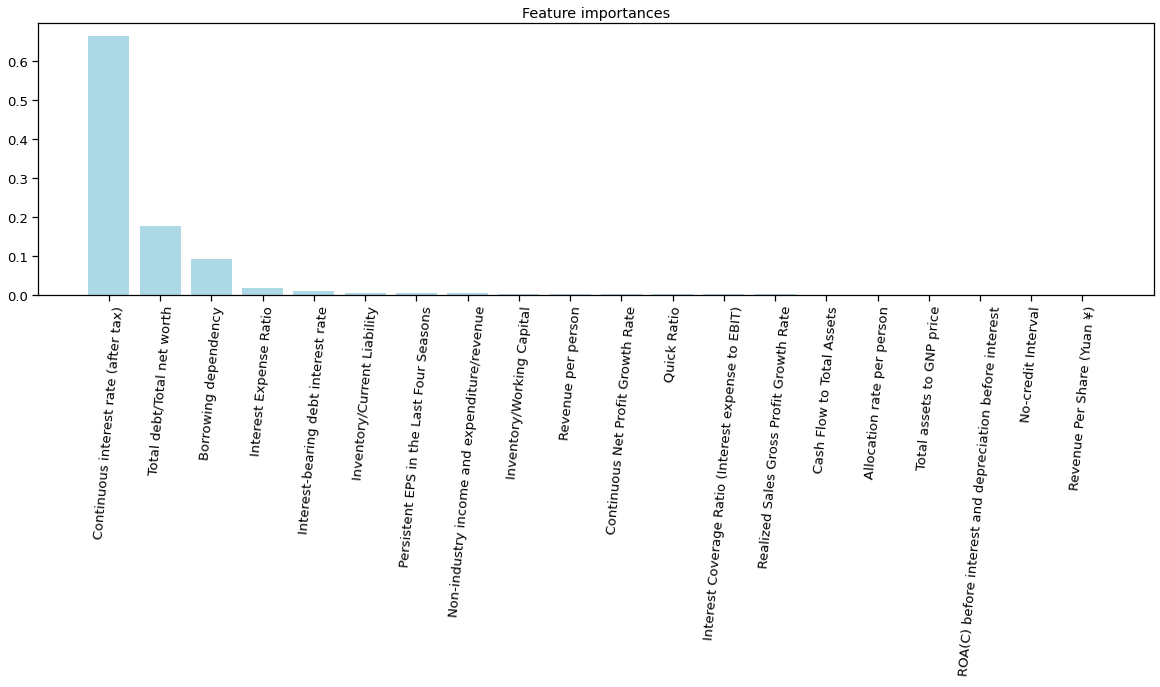

In [149]:
# Feature Importance
feature_importances_rf = pd.DataFrame(dtc.feature_importances_,
                                   index = df_t.columns[1:],
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:20]
                                    
plt.subplots(figsize=(20, 5))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="lightblue",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
plt.show()

### <b> Implementing Random Forest Classifier

In [150]:
# parameters for random forest classifier
parameter_grid = {'n_estimators': [100,150,200], 'max_depth': [20,30,50,100]}

In [151]:
grid_cv = GridSearchCV(RandomForestClassifier(), parameter_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
start = datetime.now()
grid_cv.fit(X_train, y_train)
end = datetime.now()
print(f'best score: {grid_cv.best_score_}')
print(f'best parameters: {grid_cv.best_params_}')

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best score: 0.974237365126112
best parameters: {'max_depth': 50, 'n_estimators': 100}


In [152]:
execution_time = end-start
execution_time

datetime.timedelta(seconds=231, microseconds=227492)

In [153]:
rfc = grid_cv.best_estimator_

In [154]:
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=50)

In [155]:
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)[:,-1]

In [156]:
accuracy_score(y_pred, y_test)

0.9803030303030303

[[1220   49]
 [   3 1368]]


[Text(0, 0.5, 'Not-Bankrupt'), Text(0, 1.5, 'Bankrupt')]

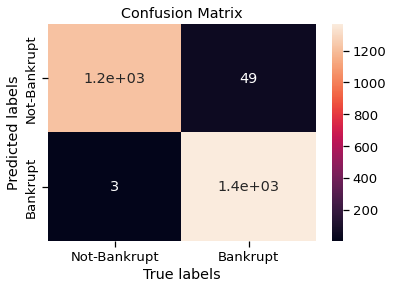

In [157]:
# get the confusion matrix
labels = ['Not-Bankrupt', 'Bankrupt']
cm = confusion_matrix(y_test, y_pred)
print(cm)

# plotting the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

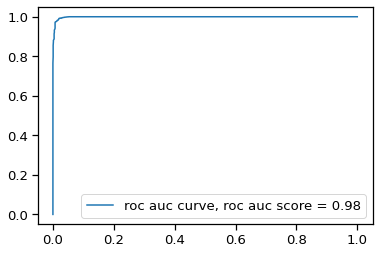

In [158]:
# ploting roc area under curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr, label = f"roc auc curve, roc auc score = {auc.round(2)}")
plt.legend(loc='lower right')
plt.show()

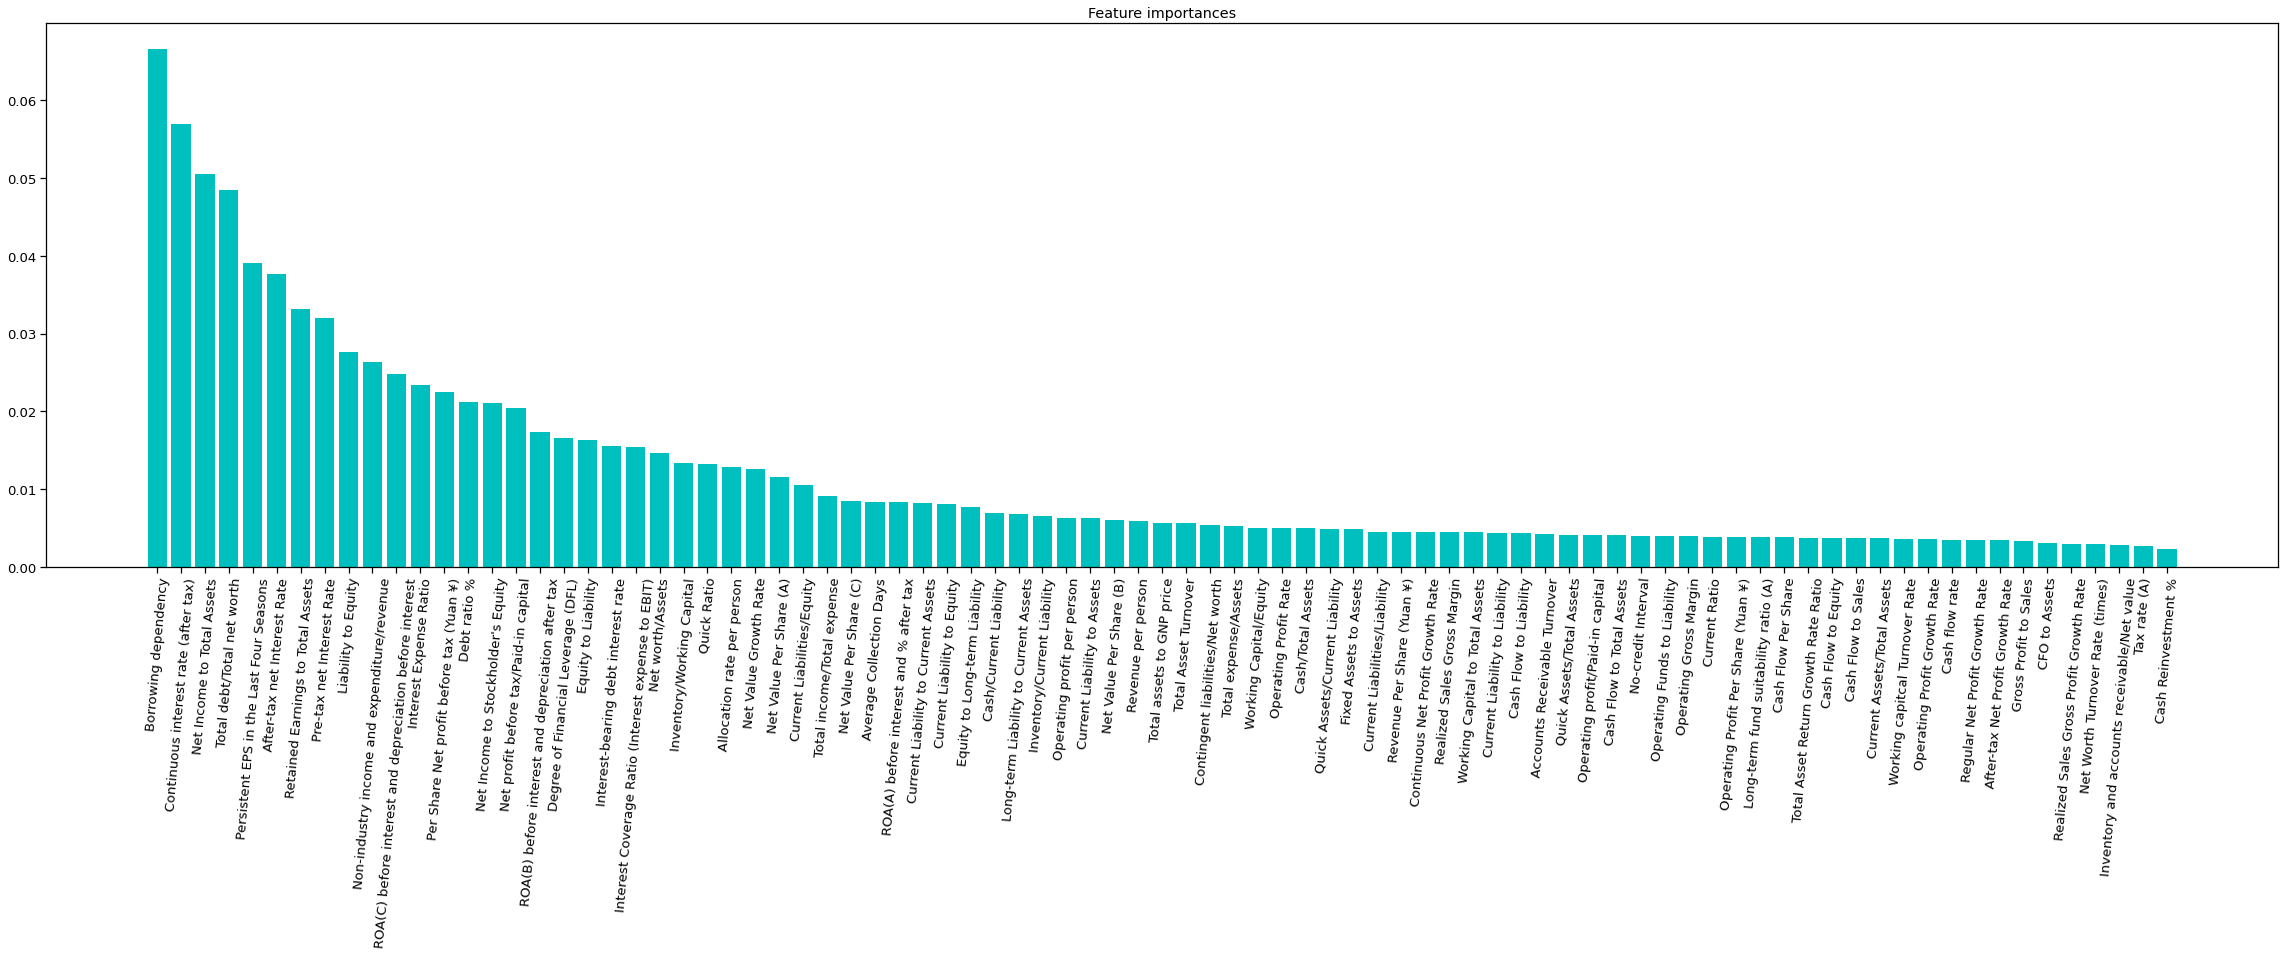

In [159]:
# Feature Importance
feature_importances_rf = pd.DataFrame(rfc.feature_importances_,
                                   index = df_t.columns[1:],
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:]
                                    
plt.subplots(figsize=(40, 10))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="c",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
plt.show()

### <b> Implemnting XGBoost

In [160]:
# parameters for xgboost
parameter_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [161]:
grid_cv = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = parameter_grid, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
start = datetime.now()
grid_cv.fit(X_train, y_train)
end = datetime.now()
xgb = grid_cv.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(colsample_bytree=0.8, max_depth=9, n_estimators=140, nthread=4,
              seed=27, subsample=0.8)

In [163]:
execution_time = end-start
execution_time

datetime.timedelta(seconds=226, microseconds=849946)

In [164]:
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:,-1]

In [165]:
accuracy_score(y_pred, y_test)

0.9821969696969697

[[1222   47]
 [   0 1371]]


[Text(0, 0.5, 'Not-Bankrupt'), Text(0, 1.5, 'Bankrupt')]

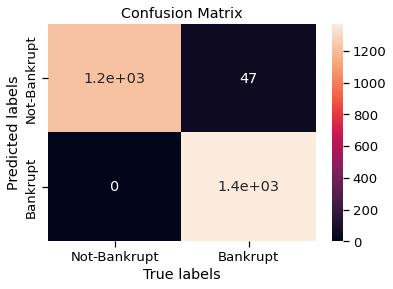

In [166]:
# get the confusion matrix
labels = ['Not-Bankrupt', 'Bankrupt']
cm = confusion_matrix(y_test, y_pred)
print(cm)

# plotting the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

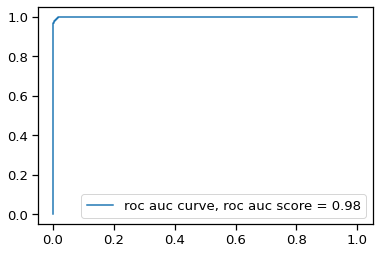

In [167]:
# ploting roc area under curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr, label = f"roc auc curve, roc auc score = {auc.round(2)}")
plt.legend(loc='lower right')
plt.show()

In [168]:
#important features respect to Xgb
pd.set_option('display.max_rows', None)
fi = pd.DataFrame(xgb.feature_importances_,
                                   index = df_t.columns[1:],
                                    columns=['Feature Importance']).sort_values('Feature Importance',
                                                                        ascending=False)[:]
fi

,Feature Importance
Continuous interest rate (after tax),0.202394
Persistent EPS in the Last Four Seasons,0.119270
Net worth/Assets,0.097208
Borrowing dependency,0.058090
Total debt/Total net worth,0.049867
Net Income to Stockholder's Equity,0.027141
Net Income to Total Assets,0.023134
Interest Expense Ratio,0.018661
Retained Earnings to Total Assets,0.014989
Interest-bearing debt interest rate,0.013217


In [169]:
# applying sum on top 5 features 
contribution = fi['Feature Importance'][:5].sum()
print(f'Top 5 features contributes to {contribution} % in the final decision ')

Top 5 features contributes to 0.5268294811248779 % in the final decision 


### <b> Implementing Support Vector Machines

In [170]:
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [171]:
grid_cv = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
start = datetime.now()
grid_cv.fit(X_train, y_train)
end = datetime.now()

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
execution_time = end-start
execution_time

datetime.timedelta(seconds=175, microseconds=273598)

In [173]:
svc = grid_cv.best_estimator_
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, probability=True)

In [174]:
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[:,-1]

In [175]:
accuracy_score(y_pred, y_test)

0.931060606060606

[[1144  125]
 [  57 1314]]


[Text(0, 0.5, 'Not-Bankrupt'), Text(0, 1.5, 'Bankrupt')]

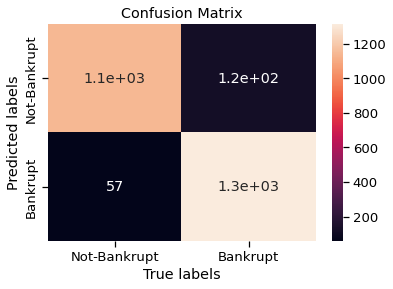

In [176]:
# get the confusion matrix
labels = ['Not-Bankrupt', 'Bankrupt']
cm = confusion_matrix(y_test, y_pred)
print(cm)

# plotting the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

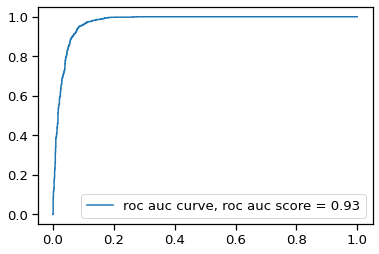

In [177]:
# ploting roc area under curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr, label = f"roc auc curve, roc auc score = {auc.round(2)}")
plt.legend(loc='lower right')
plt.show()